In [20]:
#подключаем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from plotly import graph_objects as go
import math as mth

# Тестирования изменений, связанных с внедрением улучшенной рекомендательной системы.

Интернет-магазин проводит тест для проверки улучшенной рекомендательной системы. 
Новых пользователей разделили на две группы: А (контрольная) и B (новая платёжная воронка).

Цели:
1. Проверить, что за 14 дней с момента регистрации пользователи показали увеличение конверсии не менее, чем на 10%.

2. Оценить корректность проведения теста, включая анализ пересечения тестовой аудитории с конкурирующими тестами, а также проверку совпадения временных границ теста с 
маркетинговыми событиями.

3. Оценить результаты A/B-теста, проанализировав статистическую значимость полученных результатов и сделать выводы о влиянии улучшенной рекомендательной системы на конверсии.

Имееются датафреймы с данными о маркетинговых событиях, зарегистрированных пользователях и событиях новых пользователей.

План работы:

Шаг 1 Выгрузка данных.

Шаг 2. Предобработка данных.

    2.1 Изучить инфо о датасете.
    2.2 Посмотреть пропуски и дубликаты.
    2.3 Приведём данные к нужным типам
    2.4 Объединить датафреймы users и events.

Шаг 3. Оценка корректности проведения теста.

    3.1 Проверить соответствие данных требованиям ТЗ.
    3.2 Удалить "лишних" пользователей.
    3.3 Проверка временного разделения с маркетинговыми активностями
    3.4 Проверка равномерности распределения по группам
    3.5 Выявление пересекающихся пользователей в тестах.
    3.6 удалим пользователей из ненужных регионов
    3.7 Расчет доли участников теста среди новых пользователей из Евросоюза

Шаг 4. Исследовательский анализ.

    4.1 Анализ распределения событий на пользователя в выборках
    4.2 Изучим распределение пользователей по устройствам в выборках
    4.3 Посмотреть распределение событий пользователей по дням

Шаг 5. Вывод.

## Предобработка данных 

In [23]:
#взглянем на датафреймы
display(marketing_events)
display(users.head())
display(events.head())
display(groups.head())

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [24]:
#посмотрим информацию о датафреймах
marketing_events.info()
print(50*'*')
users.info()
print(50*'*')
events.info()
print(50*'*')
groups.info()
print(50*'*')
print("Количество полных дубликатов в marketing_events:", marketing_events.duplicated().sum())
print("Количество полных дубликатов в users:", users.duplicated().sum())
print("Количество полных дубликатов в events:", events.duplicated().sum())
print("Количество полных дубликатов в groups:", groups.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      No

In [25]:
#Приведём данные к нужным типам
events['date']=pd.to_datetime(events['event_dt']).dt.date
events['event_dt']= pd.to_datetime(events['event_dt'])
users['first_date'] = pd.to_datetime(users['first_date'])

In [26]:
#объединим датасеты с данными о пользователях и о событиях
events_users = users.merge(events, on='user_id', how='inner')

In [27]:
print("Названия тестов:", groups['ab_test'].unique())

Названия тестов: ['recommender_system_test' 'interface_eu_test']


Проводятся 2 теста, нас интересует recommender_system_test.

In [29]:
print("Из каких регионов пользователи:",users['region'].unique())

Из каких регионов пользователи: ['EU' 'N.America' 'APAC' 'CIS']


Пользователи из Европы, Северной Америки, Азиатско-Тихоокеанского региона и Содружества Независимых Государств.

Выводы по разделу: 
* Пропусков в данных нет, кроме столбца details, но он для нас не важен
* Полных дубликатов в данных нет
* все столбцы имеют тип object, привели необходимые столбцы к нужному типу
* названия столбцов имеют "змеиный" тип
* количество строк во всех датасетах разное
* Все датасеты, кроме marketing_events, имеют столбец user_id - в дальнейшем по нему можно соединять датасеты. 

В целом, мы имеем качественные сырые данные.

## Оценка корректности проведения теста

In [31]:
#Проверим соответствие данных требованиям технического задания.
print('Начальная дата {}, конечная дата {}'.format(events['event_dt'].min(), events['event_dt'].max()))
print('Тест длился:', events['event_dt'].max() - events['event_dt'].min())
print(50*'*')
print("Дата остановки набора новых пользователей:", users['first_date'].max())
print("Лайфтайм последнего нового пользователя:", events['event_dt'].max()-users['first_date'].max())
print(50*'*')
print("Количество новых пользователей в разных регионах:", users['region'].value_counts())
print(50*'*')
print("Количество участников теста:", groups.query('ab_test=="recommender_system_test"')['user_id'].nunique())
print(50*'*')
print("Количество новых пользователей:", events_users.query('first_date  <="21.12.2020"')['user_id'].nunique())

Начальная дата 2020-12-07 00:00:33, конечная дата 2020-12-30 23:36:33
Тест длился: 23 days 23:36:00
**************************************************
Дата остановки набора новых пользователей: 2020-12-23 00:00:00
Лайфтайм последнего нового пользователя: 7 days 23:36:33
**************************************************
Количество новых пользователей в разных регионах: EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64
**************************************************
Количество участников теста: 6701
**************************************************


C:\Users\Redmi\AppData\Local\Temp\ipykernel_15592\372662381.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  print("Количество новых пользователей:", events_users.query('first_date  <="21.12.2020"')['user_id'].nunique())


Количество новых пользователей: 53440


In [33]:
#Удалим пользователей из users, которые пришли после 2020-12-21
users = users.query('first_date <= "2020-12-21"')

In [34]:
g = groups.query('ab_test=="recommender_system_test"').merge(users, on='user_id', how='inner')
g['first_date'].max()

Timestamp('2020-12-21 00:00:00')

<div class="alert alert-info"> </b>Дата остановки нашего теста 2020-12-21. Заданию соответствует</div>

In [35]:
# Убедимся, что время проведения теста не совпадает с маркетинговыми и другими активностями.
marketing_events.sort_values(by=['start_dt','finish_dt'])

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


Во время проведения теста было совершено 2 маркетинговых мероприятия, но участники теста застали лишь 5 дней "Christmas&New Year Promo" и первый день "CIS New Year Gift Lottery", но это нестрашно, потому что маркетинговые мероприятия будут одинаково влиять на пользователей в двух группах.

In [36]:
#Удостоверимся, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. 
#Проверим равномерность распределения пользователей по тестовым группам и правильность их формирования.
#посмотрим сколько пользователей входят в оба теста
recommender_system_test=groups.query('ab_test=="recommender_system_test"')
interface_eu_test=groups.query('ab_test=="interface_eu_test"')
p=recommender_system_test.merge(interface_eu_test, how='inner', indicator = False, on=['user_id'])
print(p['user_id'].nunique())
print("Количество пользователей из теста interface_eu_test, которые попали в контрольную группу:", recommender_system_test.query('group=="A"')['user_id'].nunique())

1602
Количество пользователей из теста interface_eu_test, которые попали в контрольную группу: 3824


В данных есть результаты двух тестов, 1602 пользователей попадают в оба теста, но так как мы ничего не знаем о 2ом тесте и не можем узнать, просто оставим только результаты recommender_system_test

In [37]:
groups_2 = groups.query('ab_test=="recommender_system_test"')
users_groups = groups_2.merge(users, on='user_id', how='inner')
users_group=users_groups.query('first_date >= "2020-12-07"').query('first_date <= "2020-12-21"')
print("Количество уникальных пользователей в тесте:", users_groups['user_id'].nunique())
print("Регионы участников теста:", users_groups['region'].value_counts())
users_groups['user_id'].nunique()

Количество уникальных пользователей в тесте: 6701
Регионы участников теста: EU           6351
N.America     223
APAC           72
CIS            55
Name: region, dtype: int64


6701

In [39]:
#удалим пользователей из других регионов
users_group = users_groups.query('region !="N.America"').query('region !="APAC"').query('region !="CIS"')
print("Число пользователей в тесте из региона EU:", users_groups['user_id'].nunique())

Число пользователей в тесте из региона EU: 6701


In [40]:
#посчитаем долю участников теста из Евросоюза от всех новых пользователей из этого региона
round(users_group['user_id'].nunique()/(users.query('region =="EU"').query('first_date >= "2020-12-07"').query('first_date <= "2020-12-21"')['user_id'].nunique()/100), 2)

15.0

<div class="alert alert-info"> <b></b> Доля пользователей, учавствующих в тесте 15% от всех новых пользователей из EU </div>

In [41]:
group_A = groups_2.query('group == "A"')
group_B = groups_2.query('group == "B"')
d=group_A.merge(group_B, how='inner', indicator = False, on=['user_id'])
print("Количество участников в группе А:", group_A['user_id'].nunique())
print("Количество участников в группе В:", group_B['user_id'].nunique())
print("Количество пользователей, попавших в обе группы:", d['user_id'].count())

Количество участников в группе А: 3824
Количество участников в группе В: 2877
Количество пользователей, попавших в обе группы: 0


Выводы по разделу: 
* Дата окончания теста не совпадает с указанной в ТЗ.
* Дата остановки набора новых пользователей не совпадает с указанной в ТЗ (на 2 дня дольше набирали)
* Больше всего новых пользователей пришло из Евросоюза (46270), доля от этих пользователей в тесте - 13.73%.
* Количество участников теста recommender_system_test - 6351 пользователь из региона EU
* В группе A почти на 1000 участников больше, чем в группе В. Распределение по группам такое: 60 на 40, это допустимо

## Исследовательский анализ 

Ответим на вопрос одинаково ли распределены количества событий на пользователя в выборках?



In [42]:
#Соединим датасет с группами пользователей с датасетом событий
events_users_groups = events.merge(users_groups, how='left')
events_users_groups = events_users_groups[events_users_groups['group'].notna()]
events_users_group_A = events_users_groups.query('group == "A"')
events_users_group_B = events_users_groups.query('group == "B"')
print(events_users_groups['user_id'].nunique())

3675


После соединения c events, осталось 3481 уникальных пользователей из тестовых групп

In [43]:
#посмотрим сколько пользователей не имеют ни одного события
missing_ids = ~users_groups['user_id'].isin(events_users_groups['user_id'])
print(users_groups[missing_ids].count())

user_id       3026
group         3026
ab_test       3026
first_date    3026
region        3026
device        3026
dtype: int64


У 2870 пользователей из тестовых групп нет ни одного события. Скорее всего по причине того, что некоторые вновь зарегистрировавшиеся были отобраны в тестовую группу, но не совершили ни одного события.
пользователя выбрали, но сайтом 

In [44]:
#убелимся, что этих польщователей нет в events на примере одного пользователя
print(events.query('user_id == "482F14783456D21B"'))
print(groups.query('user_id =="482F14783456D21B"'))
print(users.query('user_id =="482F14783456D21B"'))

Empty DataFrame
Columns: [user_id, event_dt, event_name, details, date]
Index: []
            user_id group                  ab_test
4  482F14783456D21B     B  recommender_system_test
               user_id first_date region device
7596  482F14783456D21B 2020-12-14     EU     PC


In [45]:
#проверим, у всех ли оставшихся пользователей были события
events_0 = events_users_groups.groupby('user_id')['event_name'].count().reset_index().rename(columns = {'event_name':'count'})
print("Количество пользователей без событий:", events_0.query('count==0')['user_id'].nunique())

Количество пользователей без событий: 0


In [46]:
#подсчитаем лайфтайм для каждого события
events_users_groups['lifetime'] = (events_users_groups['event_dt'] - events_users_groups['first_date']).dt.days
#зададим момент горизонта анализа 14 дней
events_users_groups = events_users_groups.query('lifetime <= 14')
print("Оставшееся количество событий с учётом лайфтайма событий:", events_users_groups['lifetime'].count())
print("Потеряли событий:", 23420 - 22828)
print("Всего осталось пользователей:", events_users_groups['user_id'].nunique())

Оставшееся количество событий с учётом лайфтайма событий: 24070
Потеряли событий: 592
Всего осталось пользователей: 3675


In [47]:
#посмотрим первые событие пользователей из теста
first_event = events_users_groups.groupby('user_id').agg({'event_name':'first'}).reset_index().rename(columns={'event_name':'first_event'})
events_users_groups = first_event.merge(events_users_groups,  on='user_id', how='left')
first_events = events_users_groups.groupby(['group','first_event']).agg({'user_id':'nunique'}).sort_values(by='user_id',ascending=False)
print(first_events)

                    user_id
group first_event          
A     purchase          872
      product_page      806
      product_cart      557
      login             512
B     product_page      267
      purchase          256
      login             228
      product_cart      177


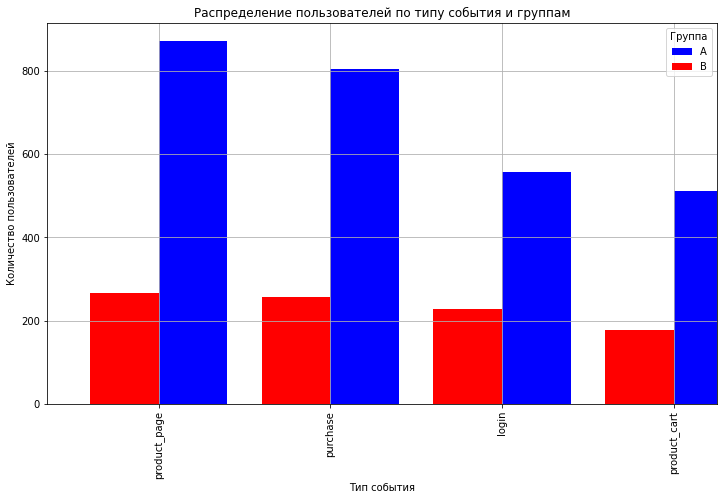

In [48]:
#Построим график количества первых событий пользователей из группы А и группы В и сравним
# создание объекта осей
plt.rcParams["figure.figsize"] = (12,7)
ax = plt.subplot(1, 1, 1)

# построение грфика для группы A
first_events['user_id']['A'].plot(kind='bar', ax=ax, position=0, width=0.4, color='blue', label='A', grid=True)

# построение графика для группы B
first_events['user_id']['B'].plot(kind='bar', ax=ax, position=1, width=0.4, color='red', label='B', grid=True)

# настройка осей и подписей к графикам
plt.xlabel('Тип события')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по типу события и группам')
plt.legend(title='Группа', bbox_to_anchor=(1, 1))
plt.show()


* Больше всего первым событием у пользователей из теста было purchase, то есть 833 пользователя из группы A и 249 пользователей из группы В сразу совершали покупку, скорее всего у приложения есть покупка в один клик

* Из группы В покупку сделали на 584 пользователя меньше, чем из группы А. То есть после внедрения "улучшенной" рекомендательной системы покупателей стало меньше

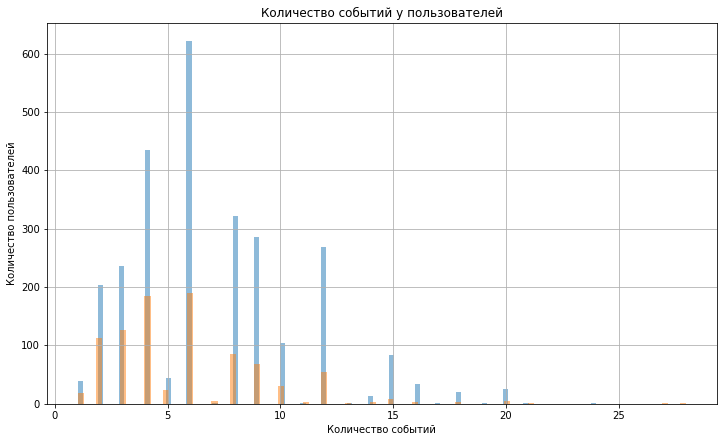

In [49]:
#Количество событий на пользователя одинаково распределены в выборках?
plt.hist(events_users_group_A.groupby('user_id')['event_name'].count(), bins=100, alpha=0.5)
plt.hist(events_users_group_B.groupby('user_id')['event_name'].count(), bins=100, alpha=0.5)
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Количество событий у пользователей')
plt.grid(True)

plt.show()

In [50]:
print("Итого пользователей в группе A:", events_users_group_A['user_id'].nunique())
print("Итого пользователей в группе В:", events_users_group_B['user_id'].nunique())

Итого пользователей в группе A: 2747
Итого пользователей в группе В: 928


Теперь количество пользователей в группе А на 1727 больше, чем в группе В

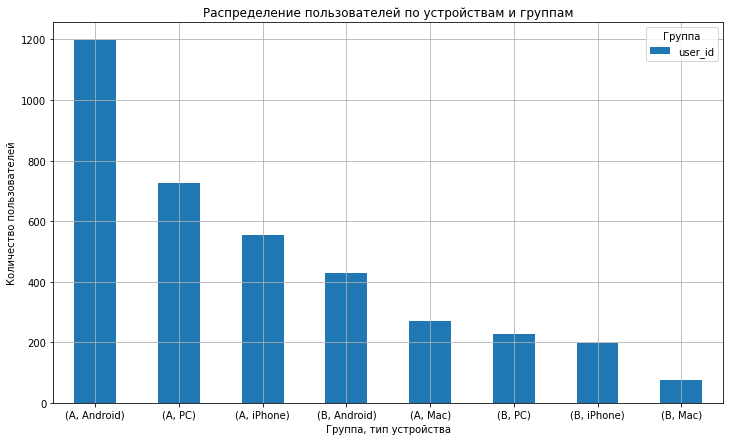

In [51]:
#посмотрим, какими устройствами пользуются клиенты
events_users_groups.groupby(['group','device'])['user_id'].nunique().sort_values(ascending=False).plot(kind='bar',grid=True)
plt.xlabel('Группа, тип устройства')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по устройствам и группам')
plt.xticks(rotation=0)
plt.legend(title='Группа', bbox_to_anchor=(1, 1))
plt.show()

В обеих группах больше всего пользователей Android, меньше всего пользователей Mac

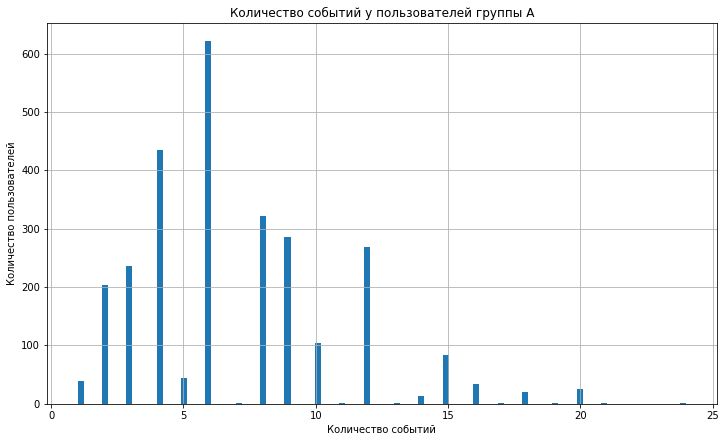

In [52]:
#Посмотрим как количество событий на пользователя распределены в выборках
# в группе А
events_users_group_A.groupby('user_id')['event_name'].count().hist(bins=100)
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Количество событий у пользователей группы А')
plt.xticks(rotation=0)
plt.show()

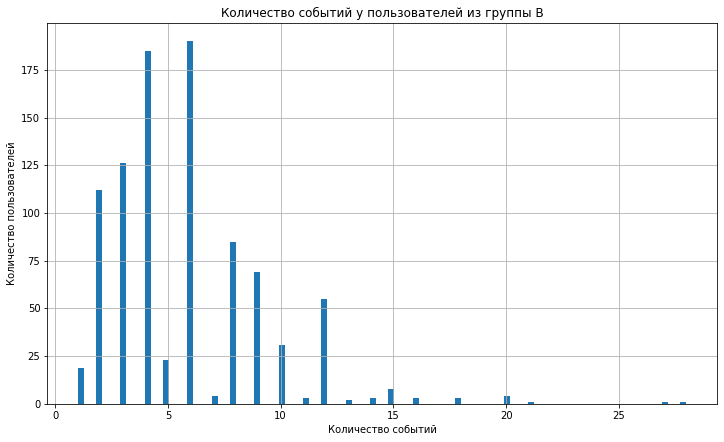

In [53]:
# в группе В
events_users_group_B.groupby('user_id')['event_name'].count().hist(bins=100)
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Количество событий у пользователей из группы В')
plt.xticks(rotation=0)
plt.show()

Количество событий на пользователя распределено между группами примерно одинаково: например, больше всего пользователей в обеих группах сделали 6 событий, а вот 7 событий почти никто не делал

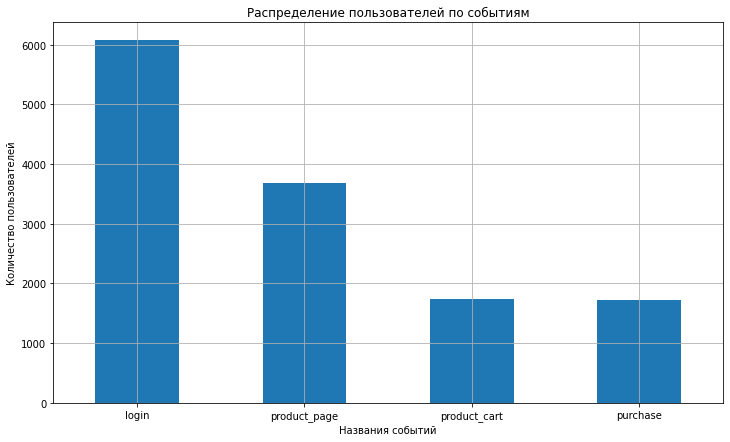

In [54]:
#Уберём пользователей, которые не входят в требуемый лайфтайм и посмотрим распределние оставшихся событий
e = events_users_groups.query('first_date < "2020-12-17"')
e.groupby('event_name')['event_dt'].nunique().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.xlabel('Названия событий')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по событиям')
plt.xticks(rotation=0)
plt.show()

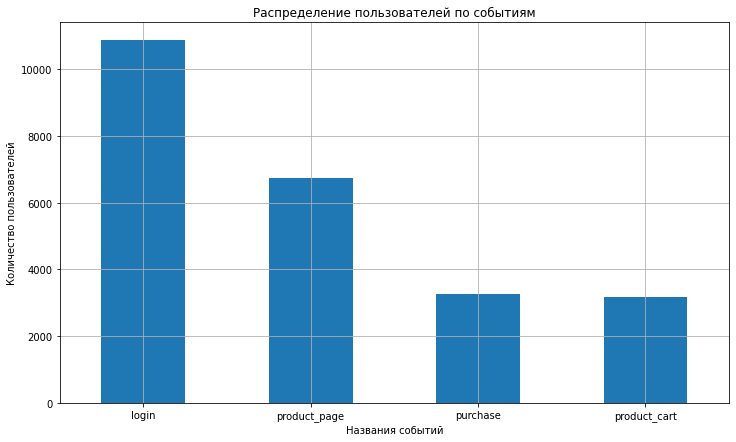

In [55]:
#посмотрим сколько событий было сделано всего
events_users_groups.groupby('event_name')['event_dt'].nunique().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.xlabel('Названия событий')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по событиям')
plt.xticks(rotation=0)
plt.show()

Пользователи, которые имеют лайфтайм менее, чем в 14 дней, не искажают пропорции воронки событий, поэтому мы их оставим

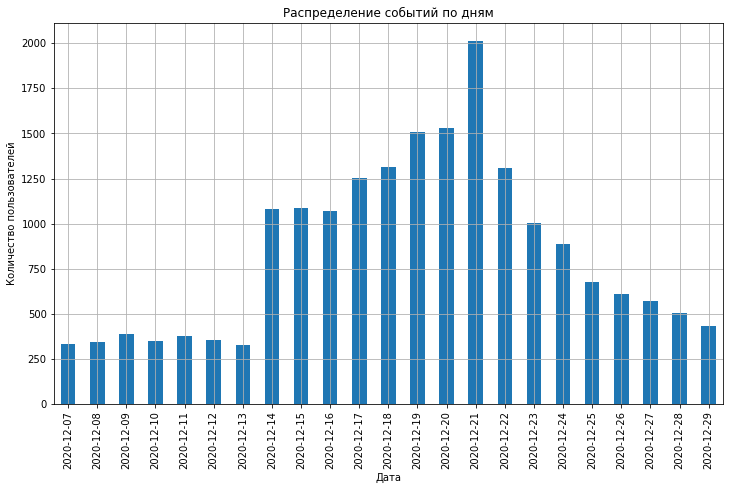

In [56]:
#Как число событий в выборках распределено по дням?
#для группы А
events_users_group_A.groupby('date')['event_name'].count().plot(kind='bar', grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Распределение событий по дням')
plt.show()

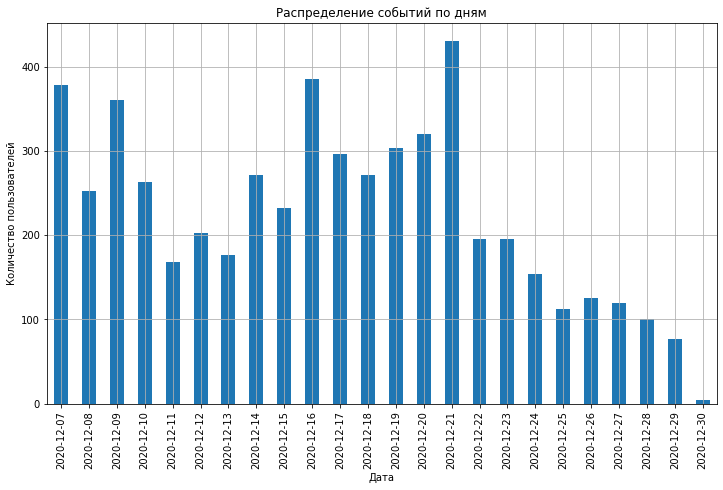

In [57]:
#Для группы В
events_users_group_B.groupby('date')['event_name'].count().plot(kind='bar', grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Распределение событий по дням')
plt.show()

* Динамика количества событий различается в группах. В группе А значительно больше событий, чем в группе В
* Первые 7 дней в группе А равномерно небольшое количество событий, затем количество событий стало увеличиваться; в группе В с первого дня теста количество событий резко колеблется
* В обеих группах больше всего событий 2020-12-21
* После 2020-12-21 количество событий с каждым днём в обеих группах стало падать

<div class="alert alert-info"> <b></b> Невозможно точно определить причину скачка в количестве событий. 
    
    Возможные причины:
* Рекламная кампания: Если группа А участвует в рекламной кампании, то скачок может быть связан с ее запуском или повышенным бюджетом в определенный день.
* Технические проблемы: Скачок может быть вызван техническими проблемами с сайтом, приложением или другой технической причиной, которая привела к более высокой активности пользователей в определенный день. 
* Праздник или событие: Скачок может быть связан с праздником, мероприятием или другим событием, которое мотивировало пользователей к более активному поведению.

Рекламных компаний в это время не было. Значит, либо 1ая, либо 2ая причина</div>

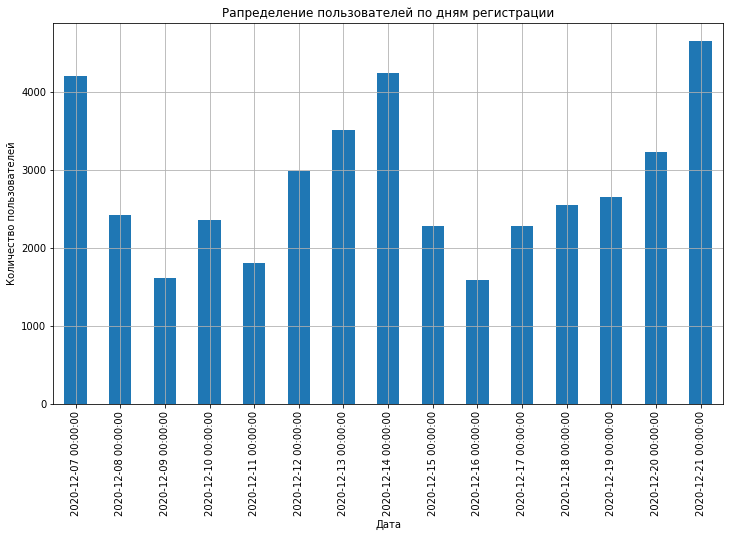

In [58]:
users.query('region =="EU"').query('first_date <= "2020-12-21"').groupby('first_date')['user_id'].nunique().plot(kind='bar',grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Рапределение пользователей по дням регистрации')
plt.show()

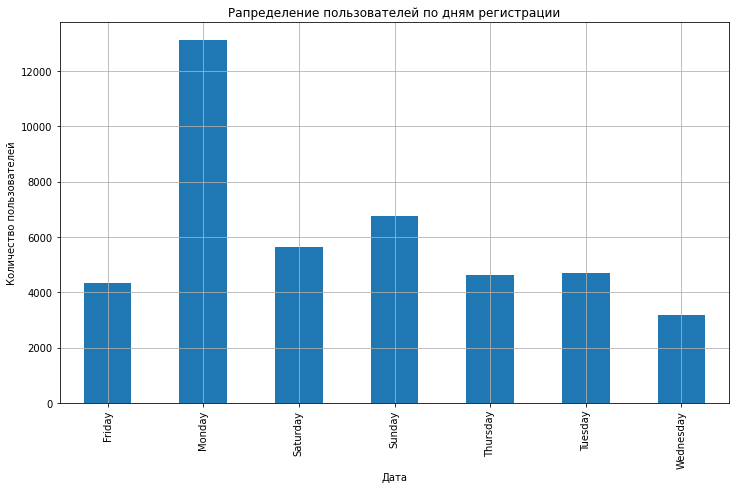

In [59]:
#и по дням недели
users['weekday'] = pd.to_datetime(users['first_date']).dt.day_name()
users.query('region =="EU"').query('first_date <= "2020-12-21"').groupby('weekday')['user_id'].nunique().plot(kind='bar',grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Рапределение пользователей по дням регистрации')
plt.show()

<div class="alert alert-info"> <b></b> В разные дни приходило разное количество пользователей. Больше всего пользователей пришло в понедельник, меньше всего в среду.</div>

In [60]:
#Посмотрим, как события распределены внутри групп
events_users_groups_count = events_users_groups.groupby(['group','event_name']).agg({'user_id':'nunique'}).sort_values('user_id', ascending=False)
#построим воронку событий
new_index = ['login', 'product_page	','product_cart','purchase']
fig = go.Figure() 
for group in ["A","B"]:
    funnel = events_users_groups_count.query('group == @group')
    fig.add_trace(go.Funnel(name = group, y =new_index, x = funnel['user_id'], orientation = "h", textinfo = "value+percent initial"))
    fig.update_layout(title='Воронка событий по группам')
fig.show()

* Событий в группе А больше по сравнению с группой В, но это не столь важно, потому что нас интересует процентное соотношение
* В группе В на кажом шаге меньше процент пользователей, которые перешли на каждое следующее событие, чем в группе А

На всех шагах конверсия выше у группы А. 
* конверсия в просмотр карточек товаров — product_page - выше в группе А(65%); а в группе В - 56%
* конверсии в просмотры корзины — product_cart в группе А 32%, а в группе В 28%
* конверсия в покупку на данной воронке отображается некорректно

In [61]:
# посмотрим, сколько % пользователей из Евросоюза 
round(events_users_groups['user_id'].nunique()/(users.query('region =="EU"').query('first_date <= "2020-12-21"')['user_id'].nunique()/100),2)

8.68

1. По итогу получилось не 15% пользователей из EU, а 8.68%
2. Тест остановили на 5 дней раньше, чем указано в ТЗ
3. В событии purchase смешаны события покупок из корзины и события покупок в один клик
4. 2870 пользователей из тестовых групп не имеют событий

Выводы по разделу:
* В тестовой группе конверсия стала хуже, по сравнению с контрольной группой
* У 2870 пользователей из тестовых групп нет ни одного события, их пришлось откинуть, осталось 3481
* В группе А в несколько раз больше событий, чем в группе В
* Первые события у пользователей из тестовых групп были разные, больше всего первым событием была покупка, меньше всего просмотры корзины 
* Количество событий на пользователя распределено неравномерно
* Пользователи, которые имеют лайфтайм менее, чем в 14 дней, не искажают пропорции воронки событий, поэтому мы их оставим
* В динамике количества событий по дням прослеживается закономерность: до 2020-12-21 количество событий растёт, после 2020-12-21 падает

## Оценка результатов А/В-теста 

In [62]:
# создадим датафреймы с количеством событий по группам
conversion_A = pd.DataFrame({
    'event_name': ['login', 'product_page', 'product_cart', 'purchase'],
    'count_users': [2604, 1685, 782, 833]})

conversion_B = pd.DataFrame({
    'event_name': ['login', 'product_page', 'product_cart', 'purchase'],
    'count_users': [877, 493, 244, 249]})

In [63]:
#Рассчитаем конверсию для каждого события в каждой группе и сравним
pd.options.mode.chained_assignment = None
def calculate_conversion(df):
    # создать новый столбец для хранения значения конверсии
    df['conversion'] = 0.0

    # рассчитать конверсию для каждого события
    for i in range(len(df)):
        if i == 0:
            df['conversion'][i] = 100
        else:
            first_event_users = df['count_users'][0]
            next_event_users = df['count_users'][i]
            conversion = next_event_users / first_event_users
            df['conversion'][i] = conversion*100

    # вернуть датафрейм с посчитанными значениями конверсии
    return df


In [64]:
conversion_A = calculate_conversion(conversion_A)
conversion_B = calculate_conversion(conversion_B)
# конверсия группы А
conversion_A

,event_name,count_users,conversion
0,login,2604,100.000000
1,product_page,1685,64.708141
2,product_cart,782,30.030722
3,purchase,833,31.989247


In [65]:
# конверсия группы В
conversion_B

,event_name,count_users,conversion
0,login,877,100.000000
1,product_page,493,56.214367
2,product_cart,244,27.822121
3,purchase,249,28.392246


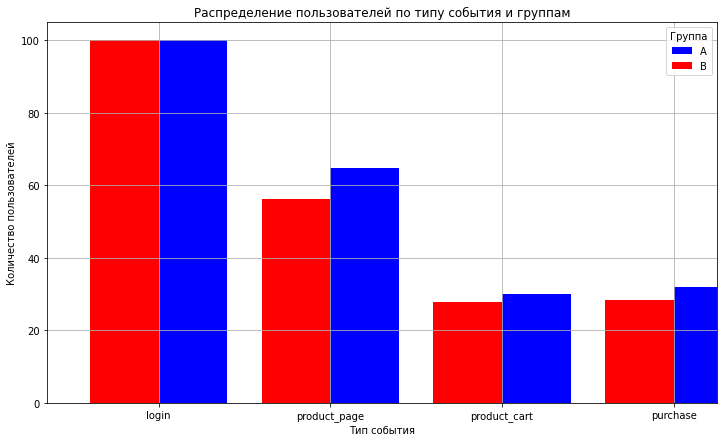

In [66]:
#построим график для сравнения конверсий
# создание объекта осей
ax = plt.subplot(1, 1, 1)

# построение графика для группы A
conversion_A.plot(x='event_name', y='conversion', kind='bar', ax=ax, position=0, width=0.4, color='blue', label='A', grid=True)

# построение графика для группы B
conversion_B.plot(x='event_name', y='conversion', kind='bar', ax=ax, position=1, width=0.4, color='red', label='B', grid=True)

# настройка осей и подписей к графикам
plt.xlabel('Тип события')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по типу события и группам')
plt.xticks(rotation=0)
plt.legend(title='Группа', bbox_to_anchor=(1, 1))
plt.show()

plt.show()

Сравнили конверсию на каждом шаге, конверсия группы А на каждом шаге выше

In [67]:
# соединим конверсии групп в один датафрейм
merged_df = conversion_A.merge(conversion_B, on='event_name', suffixes=('_A', '_B'))

In [68]:
#найдём разницу между конверсией группы А и группы В
merged_df['diff'] = merged_df.apply(lambda row: row['conversion_B'] - row['conversion_A'], axis=1)
merged_df

,event_name,count_users_A,conversion_A,count_users_B,conversion_B,diff
0,login,2604,100.000000,877,100.000000,0.000000
1,product_page,1685,64.708141,493,56.214367,-8.493774
2,product_cart,782,30.030722,244,27.822121,-2.208601
3,purchase,833,31.989247,249,28.392246,-3.597001


На каждом шаге конверсия в группе В понижалась

## Проверка гипотез

Есть 3 гипотезы:

1. Группы демонстрируют разную конверсию в просмотр карточек товаров — product_page

H0: группы демонстрируют одинаковую конверсию в просмотры контактов

H1: группы демонстрируют разную конверсию в просмотры контактов

2. Группы демонстрируют разную конверсию в просмотр корзины — product_cart

H0: группы демонстрируют одинаковую конверсию в просмотры контактов

H1: группы демонстрируют разную конверсию в просмотры контактов

3. Группы демонстрируют разную конверсию в просмотр корзины — purchase

H0: группы демонстрируют одинаковую конверсию в просмотры контактов

H1: группы демонстрируют разную конверсию в просмотры контактов

In [69]:
def z_test(successes, trials):  
    alpha = 0.05 # стандартный уровень значимости
    n = 3 # число сравнений
    alpha_corr = alpha/n # скорректированный уровень значимости

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    
    print(successes[0], successes[1], trials[0],trials[1])

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha_corr:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')


In [70]:
#создадим цикл для подстановки переменных
# список индексов для цикла
indexes = [1, 2, 3]

# цикл для вычисления Z-критерия для каждой пары групп
for i in indexes:
    successes = merged_df['count_users_A'][i], merged_df['count_users_B'][i]
    trials = merged_df['count_users_A'][0], merged_df['count_users_B'][0]
    z_test(successes, trials)


1685 493 2604 877
p-значение:  6.942739359416805e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница
782 244 2604 877
p-значение:  0.21469192029582396
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
833 249 2604 877
p-значение:  0.04652482738393027
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


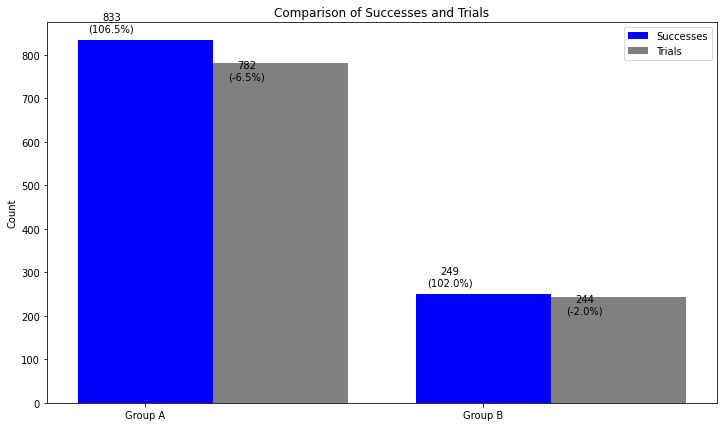

<Figure size 864x504 with 0 Axes>

In [71]:
successes = [833, 249]
trials =[782, 244]
group_names = ['Group A', 'Group B']

fig, ax = plt.subplots()

ax.bar(group_names, successes, width=0.4, label='Successes', color='blue')
ax.bar([i + 0.4 for i in range(len(group_names))], trials, width=0.4, label='Trials', color='gray')

# добавляем метки над каждым столбцом
for i, v in enumerate(successes):
    ax.text(i-0.1, v+20, str(v)+'\n({:.1f}%)'.format(v/trials[i]*100), color='black', fontsize=10, ha='center')
for i, v in enumerate(trials):
    ax.text(i+0.3, v-40, str(v)+'\n({:.1f}%)'.format((v-successes[i])/v*100), color='black', fontsize=10, ha='center')

ax.set_ylabel('Count')
ax.set_title('Comparison of Successes and Trials')
ax.legend()

plt.show()
plt.savefig('my_plot.png', bbox_inches='tight')


Конверсию в покупки не смогли сравнить, так как у приложения есть опция "покупка в один клик" и эти события смешиваются с событиями о покупках из корзины. В группе А доля пользователей, сделавших покупку выше, чем в группе В на 4.5%

## Выводы

* В ходе работы, мы сделали предобработку данных, провели исследовательский анализ, оценили корректность проведения А/В-теста и оценили его результаты.
* Дата окончания теста не совпадает с указанной в ТЗ.
* В целом, тест проведён некорректно
* По итогу получилось не 15% пользователей из EU, а 5.93%
* После обработки данных, в тестовых группах осталось 3481 уникальных пользователей
* 2870 пользователей из тестовых групп не имеют событий
* В группе А в несколько раз больше пользователей и событий, чем в группе В
* В событии purchase смешаны события покупок из корзины и события покупок в один клик
* Первые события у пользователей из тестовых групп были разные, больше всего первым событием была покупка, меньше всего просмотры корзины
* Среднее количество событий на пользователя - 7.
* Внедрение улучшенной рекомендательной системы не привело к ожидаемому результату, напротив, конверсия в тестовой группе понижалась на каждом шаге относительно контрольной группы

<div class="alert alert-info"> <b></b> Новая рекомендательная система оказалась не эффективной, вместо повышения конверсии, получили её понижение. 
    
Нужно учитывать, что тест проведён не совсем корректно: 
    
    1. наша тестовая группа пересекалась с другой тестовой группой(о которой мы ничего не знаем), 
    2. Тест проводился меньшее количество дней, чем было запланировано 
    3. В событии purchase смешаны события покупок из корзины и события покупок в один клик.
    4. Вместо 15% пользователей из EU, получилось 8%

По этим причинам, первая рекомендация - провести корректный тест; вторая рекомендация - искать новые пути повышения конверсии</div>